In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/beatsdataset/beatsdataset.csv


## 1_Electronic Music Classification

![](https://th.bing.com/th/id/R.8838fba0665a1cf1d2c75d467bebf00b?rik=hPhrvym3sR3tlA&riu=http%3a%2f%2fdancemusicnw.com%2fwp-content%2fuploads%2f2017%2f03%2fElectronic_Music_Guide-1-e1489713866135.jpg&ehk=lhSpq6zycDTOHop4ApjmGOvA3MTqYQ2m%2b06C7PbY6%2bE%3d&risl=&pid=ImgRaw&r=0.png)

## 2_ About the dataset
- One of the fascinating aspects of human perception is our ability to distinguish between different music genres. Whether it's classical, rock, jazz, or hip-hop, we can often tell them apart within seconds of listening. But what makes this possible? How do we instinctively recognize the characteristics that define a genre, like rhythm, melody, instrumentation, or tempo?

## 3_ Import our libraries that we need it in this notebook

In [2]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

## 4_Export our dataset from CSV link

In [3]:
df = pd.read_csv('/kaggle/input/beatsdataset/beatsdataset.csv')
df

,Unnamed: 0,1-ZCRm,2-Energym,3-EnergyEntropym,4-SpectralCentroidm,5-SpectralSpreadm,6-SpectralEntropym,7-SpectralFluxm,8-SpectralRolloffm,9-MFCCs1m,...,63-ChromaVector8std,64-ChromaVector9std,65-ChromaVector10std,66-ChromaVector11std,67-ChromaVector12std,68-ChromaDeviationstd,69-BPM,70-BPMconf,71-BPMessentia,class
0,0,0.136440,0.088861,3.201201,0.262825,0.249212,1.114423,0.007003,0.256682,-22.723259,...,0.003431,0.004981,0.010818,0.024001,0.005201,0.015056,133.333333,0.132792,128.0,BigRoom
1,1,0.117039,0.108389,3.194001,0.247657,0.250288,1.065668,0.005387,0.199821,-21.775871,...,0.004461,0.006441,0.007469,0.015499,0.005589,0.019339,120.000000,0.112767,126.0,BigRoom
2,2,0.085308,0.128525,3.123837,0.217205,0.228652,0.789647,0.008247,0.156822,-22.472722,...,0.001529,0.004556,0.007723,0.017482,0.002901,0.022201,133.333333,0.123373,129.0,BigRoom
3,3,0.103050,0.167042,3.150830,0.233593,0.245032,0.967082,0.006571,0.168083,-21.470751,...,0.001591,0.003514,0.009477,0.023162,0.004165,0.015379,133.333333,0.158876,129.0,BigRoom
4,4,0.151730,0.148405,3.194498,0.293730,0.267231,1.353005,0.003872,0.292055,-21.371157,...,0.003945,0.004131,0.011330,0.028188,0.002639,0.019079,133.333333,0.190708,129.0,BigRoom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2295,0.123267,0.057100,3.208952,0.256296,0.251077,1.154926,0.005292,0.224646,-22.367698,...,0.003534,0.004703,0.010987,0.032269,0.001926,0.016028,133.333333,0.210512,138.0,Trance
2296,2296,0.142276,0.092951,3.115607,0.264407,0.255826,1.210942,0.010418,0.265019,-22.393598,...,0.002769,0.005422,0.008997,0.027547,0.003881,0.016097,133.333333,0.186191,141.0,Trance
2297,2297,0.125569,0.030196,3.192922,0.224583,0.216269,1.031649,0.004061,0.258191,-23.505045,...,0.003643,0.005395,0.005646,0.014202,0.004689,0.009465,600.000000,0.142741,92.0,Trance
2298,2298,0.118206,0.108737,3.149557,0.253396,0.246574,1.066546,0.008032,0.200640,-22.203477,...,0.001375,0.003538,0.006213,0.035527,0.001729,0.020659,133.333333,0.232040,133.0,Trance


- After we are export the dataset from CSV we find that we have 2300 rows and 73 columns and our targit here is the column 'class'

- So we need to checking our dataset if there are any columns need to convert it to numeric values that we need it in our working

## 5_Information type dataset

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 73 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2300 non-null   int64  
 1   1-ZCRm                  2300 non-null   float64
 2   2-Energym               2300 non-null   float64
 3   3-EnergyEntropym        2300 non-null   float64
 4   4-SpectralCentroidm     2300 non-null   float64
 5   5-SpectralSpreadm       2300 non-null   float64
 6   6-SpectralEntropym      2300 non-null   float64
 7   7-SpectralFluxm         2300 non-null   float64
 8   8-SpectralRolloffm      2300 non-null   float64
 9   9-MFCCs1m               2300 non-null   float64
 10  10-MFCCs2m              2300 non-null   float64
 11  11-MFCCs3m              2300 non-null   float64
 12  12-MFCCs4m              2300 non-null   float64
 13  13-MFCCs5m              2300 non-null   float64
 14  14-MFCCs6m              2300 non-null   

- If we noticed here in our dataset we find only we must covert one column to numeric values it is 'calss'

## 6_Export the values for this column

In [5]:
df['class'].value_counts()

class
BigRoom                 100
HardDance               100
Techno                  100
TechHouse               100
ReggaeDub               100
PsyTrance               100
ProgressiveHouse        100
Minimal                 100
IndieDanceNuDisco       100
House                   100
HipHop                  100
HardcoreHardTechno      100
Breaks                  100
GlitchHop               100
FutureHouse             100
FunkRAndB               100
ElectronicaDowntempo    100
ElectroHouse            100
Dubstep                 100
DrumAndBass             100
DeepHouse               100
Dance                   100
Trance                  100
Name: count, dtype: int64

## 7_Conmvert the column to the numerical values

In [6]:
label_mapping = {
    'BigRoom' : 0,
    'HardDance' : 1,
    'Techno' : 2,
    'TechHouse' : 3,
    'ReggaeDub' : 4,
    'PsyTrance' : 5,
    'ProgressiveHouse' : 6,
    'Minimal' : 7,
    'IndieDanceNuDisco' : 8,
    'House' : 9,
    'HipHop' : 10,
    'HardcoreHardTechno' : 11,
    'Breaks' : 12,
    'GlitchHop' : 13,
    'FutureHouse' : 14,
    'FunkRAndB' : 15,
    'ElectronicaDowntempo' : 16,
    'ElectroHouse' : 17,
    'Dubstep' : 18,
    'DrumAndBass' : 19,
    'DeepHouse' : 20,
    'Dance' : 21,
    'Trance' : 22
}
# Map the labels to their respective categories
df['label_class']=df['class'].map(label_mapping)

## 8_ Split columns as values between X and y

In [7]:
X = df.drop(columns=['class'])  # All columns except 'class' y = data['class']
y = df['class']

- And we see here all the columns ut is to X except the 'class' column to the Y

## 9_ Split the values between X(Train and Test) and Y(Train and Test)

In [8]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.20)

## 10_Building the model

In [9]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

## 11_Predict our model

In [10]:
y_pred = model.predict(X_test)
y_pred

array(['HardcoreHardTechno', 'Dance', 'IndieDanceNuDisco', 'Breaks',
       'ElectroHouse', 'TechHouse', 'IndieDanceNuDisco', 'FutureHouse',
       'HipHop', 'Dance', 'Dubstep', 'ElectronicaDowntempo',
       'DrumAndBass', 'DeepHouse', 'Minimal', 'IndieDanceNuDisco',
       'DrumAndBass', 'FunkRAndB', 'HardDance', 'FunkRAndB', 'Trance',
       'HardDance', 'ProgressiveHouse', 'FutureHouse', 'Dubstep',
       'PsyTrance', 'Dubstep', 'BigRoom', 'House', 'BigRoom', 'PsyTrance',
       'Trance', 'PsyTrance', 'Trance', 'Breaks', 'House', 'Techno',
       'ReggaeDub', 'ProgressiveHouse', 'Dance', 'IndieDanceNuDisco',
       'GlitchHop', 'Minimal', 'HipHop', 'PsyTrance', 'PsyTrance',
       'GlitchHop', 'Trance', 'PsyTrance', 'FunkRAndB', 'FutureHouse',
       'GlitchHop', 'FutureHouse', 'House', 'PsyTrance', 'HardDance',
       'IndieDanceNuDisco', 'Dubstep', 'FunkRAndB', 'GlitchHop',
       'ProgressiveHouse', 'Trance', 'DeepHouse', 'House', 'BigRoom',
       'DrumAndBass', 'GlitchHop', 'D

## 12_Accuracy that recorded by model

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9695652173913043

## 13_Knn values recorded

In [12]:
# Define the range of k values to test
k_values = range(3,10,2)
test_accuracies = []

# Train the k-NN classifier with different values of k and evaluate on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train the model
    y_pred = knn.predict(X_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    test_accuracies.append(accuracy)

# Determine the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"The best k value is: {best_k}")

The best k value is: 3


## 14_The visualization

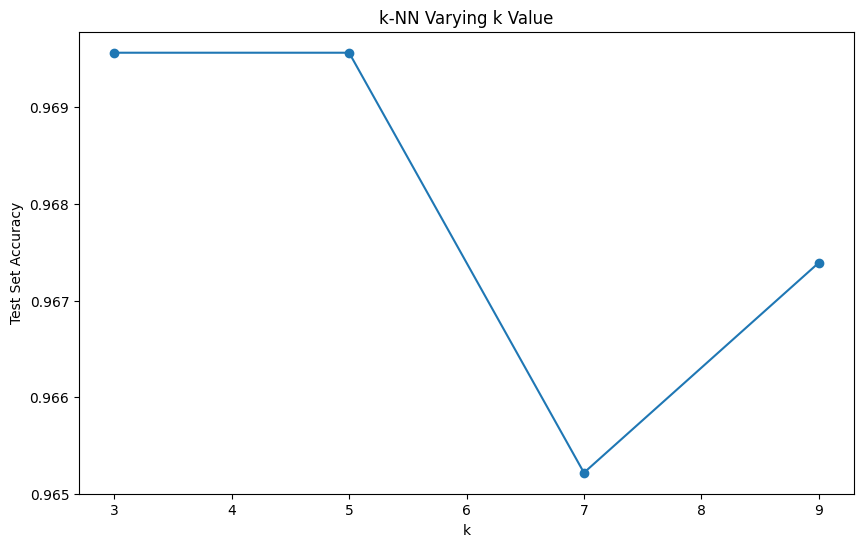

In [13]:
# Plot the k values vs. accuracy on the test set
plt.figure(figsize=(10, 6))
plt.plot(k_values, test_accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k Value')
plt.show()